In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
EPLData=pd.read_excel('4 Seasons 2016-20 EPL ML Data.xlsx')

In [3]:
#Function which uses simulation to generate accuracy of a model given a predictive distribution and actual distribution 

def NaiveBenchmark(NaiveProb_HW,NaiveProb_D,ActualResultDist):
    Results=['HW','D','HL']
    accuracy=[]
    NaiveProb_HL=1-NaiveProb_HW-NaiveProb_D
    for i in range(10000):
        actual=np.random.choice(Results,p=[NaiveProb_HW,NaiveProb_D,NaiveProb_HL])
        predicted=np.random.choice(Results,p=ActualResultDist)
        if predicted==actual:
            accuracy.append(1)
        else:
            accuracy.append(0)
    return sum(accuracy)/len(accuracy)
            

In [4]:
#Generate accuracy of Naive model - Predict each result 1/3rd of the time

ModelAccuracies={}

ActualResultDist=EPLData['Results'].value_counts()/len(EPLData['Results'].values)

ModelAccuracies['NaiveBenchmark']=NaiveBenchmark(0.33,0.33,ActualResultDist.values)

##             Data Exploration

Text(0.5, 1.0, 'Distribution of Game Results')

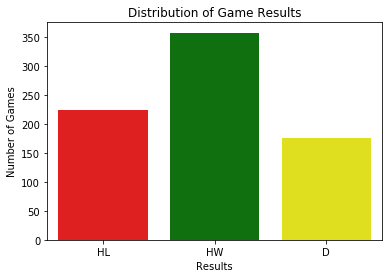

In [5]:
# Generate Result distribution plot

my_pal = {"HW":"green", "HL": "red", "D":"yellow"}

fig=sns.countplot(EPLData['Results'],palette=my_pal)
plt.xlabel("Results")
plt.ylabel("Number of Games")
plt.title("Distribution of Game Results")

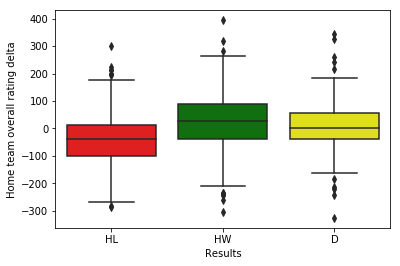

In [6]:
# Generate boxplot to see how Results vary with the Home team "overall" rating delta

sns.boxplot(EPLData['Results'],EPLData['overall'],palette=my_pal)
plt.xlabel("Results")
plt.ylabel("Home team overall rating delta")
plt.show()

In [7]:
# Create two buckets - Home win and No win (draw or loss)
# Use for future scenario

# EPLData.replace(['D','HL'],'NoWin',inplace=True)


## Prepare data for machine learning input format

In [8]:
# Create predictor features and target class vectors

X=EPLData.drop(columns=['Results'])

Y=EPLData['Results']

In [9]:
# Standardize the features

from sklearn.preprocessing import RobustScaler
Scaler=RobustScaler()
X=Scaler.fit_transform(X)



In [10]:
#Using 2/3rd - 1/3rd as training set - test set ratio 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

## Train machine learning models

In [11]:
# Logistic Regeression


from sklearn.linear_model import LogisticRegression

LGmodel=LogisticRegression(class_weight="balanced",multi_class='auto',solver='lbfgs')

LGmodel.fit(X_train,y_train)

predictions=LGmodel.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

ModelAccuracies['Logistic Regression']=accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           D       0.33      0.27      0.30        59
          HL       0.51      0.64      0.57        77
          HW       0.58      0.54      0.56       115

   micro avg       0.51      0.51      0.51       251
   macro avg       0.47      0.48      0.47       251
weighted avg       0.50      0.51      0.50       251

0.5059760956175299


In [12]:
# Random Forests

from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators=10,class_weight="balanced")
RFmodel.fit(X_train,y_train)
predictions=RFmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

ModelAccuracies['Random Forest']=accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           D       0.24      0.19      0.21        59
          HL       0.45      0.45      0.45        77
          HW       0.50      0.55      0.52       115

   micro avg       0.43      0.43      0.43       251
   macro avg       0.39      0.40      0.39       251
weighted avg       0.42      0.43      0.43       251

0.4342629482071713


In [13]:
#Support Vector Machines

from sklearn.svm import SVC
SVMmodel=SVC(class_weight="balanced")
SVMmodel.fit(X_train,y_train)
predictions=SVMmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

ModelAccuracies['SVM']=accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           D       0.27      0.44      0.33        59
          HL       0.57      0.52      0.54        77
          HW       0.63      0.45      0.53       115

   micro avg       0.47      0.47      0.47       251
   macro avg       0.49      0.47      0.47       251
weighted avg       0.52      0.47      0.49       251

0.4701195219123506


C:\Users\okaak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
NaiveBayesmodel=GaussianNB()
NaiveBayesmodel.fit(X_train,y_train)
predictions=NaiveBayesmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

ModelAccuracies['Naive Bayes']=accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           D       0.33      0.10      0.16        59
          HL       0.50      0.68      0.57        77
          HW       0.59      0.65      0.62       115

   micro avg       0.53      0.53      0.53       251
   macro avg       0.47      0.48      0.45       251
weighted avg       0.50      0.53      0.49       251

0.5298804780876494


## Train Neural Network



In [15]:
# Convert target classes to numerical type for Neural network training

y_train.replace(['HW','D','HL'],[0,1,2],inplace=True)
y_test.replace(['HW','D','HL'],[0,1,2],inplace=True)

In [16]:
NNAcurracies=[] ## List to store Neural Network accuracies for multiple runs

for i in range(10):
    
    #Create Neural network with one Hidden layers

    model = tf.keras.models.Sequential()  
    model.add(tf.keras.layers.Flatten())  
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))  #Hidden layer
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax)) #Output layer

    #Compile model using the Adam optimiser

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

    #Train the model

    model.fit(X_train, y_train.values, epochs=20,verbose=0)  

    #Test NN model on out of sample data

    val_loss, val_acc = model.evaluate(X_test, y_test.values,verbose=0)  
    NNAcurracies.append(val_acc)


print(NNAcurracies)
print(sum(NNAcurracies)/len(NNAcurracies))

#  Record average accuracy of Neural network runs

ModelAccuracies['Neural Network']=sum(NNAcurracies)/len(NNAcurracies)

[0.52589643, 0.5458167, 0.56573707, 0.5378486, 0.5458167, 0.55378485, 0.561753, 0.52589643, 0.55776894, 0.52988046]
0.5450199186801911


## Result Evaluation and Benchmarking 

In [17]:
# Bookmaker odds from last 9 years data

ModelAccuracies['Betting Co Odds']=0.54

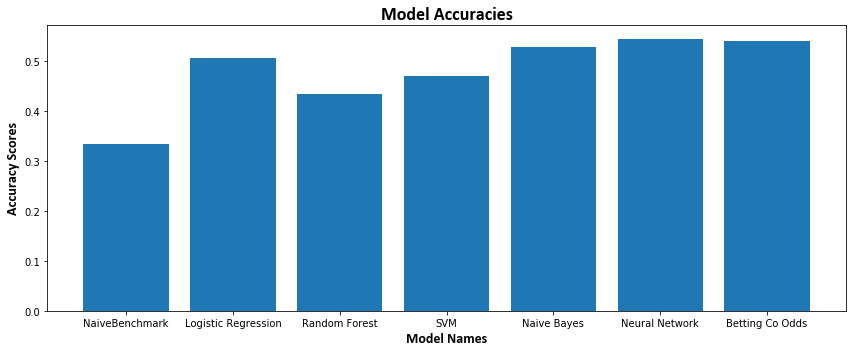

In [18]:
#Plot accuracy scores of different models

font = {'family': 'calibri',
        'weight': 'bold',
        'size': 14,
        }

fonttitle = {'family': 'calibri',
        'weight': 'bold',
        'size': 18,
        }
fig=plt.figure(figsize=(12,5))
plt.bar(ModelAccuracies.keys(),ModelAccuracies.values())
plt.xlabel("Model Names",fontdict=font)
plt.ylabel("Accuracy Scores",fontdict=font)
plt.title("Model Accuracies",fontdict=fonttitle)
plt.xticks
plt.tight_layout()
plt.show()


In [19]:
ModelAccuracies

{'NaiveBenchmark': 0.3343,
 'Logistic Regression': 0.5059760956175299,
 'Random Forest': 0.4342629482071713,
 'SVM': 0.4701195219123506,
 'Naive Bayes': 0.5298804780876494,
 'Neural Network': 0.5450199186801911,
 'Betting Co Odds': 0.54}